# Predicting the Survival of Titanic Passengers: Preprocessing and Model Training

## Preprocessing

In [1]:
import numpy as np
import pandas as pd

seed = 0
train = pd.read_csv('../input/titanic/train.csv')
test = pd.read_csv('../input/titanic/test.csv')

In [2]:
# Saving passenger IDs in a new dataframe

output = pd.DataFrame(test.PassengerId)

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

In [4]:
def get_nulls_dtypes(df):
    mask = df.isnull()
    total = mask.sum()
    percent = mask.mean() * 100
    dtypes = df.dtypes

    missing_data = pd.concat([total, percent, dtypes], axis=1, join='outer',\
                             keys=['count_null', 'percent_null', 'data_type'])
    missing_data.sort_values(by='percent_null', ascending=False, inplace=True)
    return missing_data[missing_data.count_null > 0]

In [5]:
get_nulls_dtypes(train)

,count_null,percent_null,data_type
Cabin,687,77.104377,object
Age,177,19.865320,float64
Embarked,2,0.224467,object


In [6]:
get_nulls_dtypes(test)

,count_null,percent_null,data_type
Cabin,327,78.229665,object
Age,86,20.574163,float64
Fare,1,0.239234,float64


In [7]:
datasets = [train, test]

for dataset in datasets:
    dataset.drop(['PassengerId', 'Ticket'], axis=1, inplace=True)

In [8]:
datasets = [train, test]

for dataset in datasets:
    mean_age = train.Age.mean()
    std_age = test.Age.std()
    num_null = dataset.Age.isnull().sum()
    
    random_age = np.random.randint(mean_age - std_age, mean_age + std_age, size=num_null)
    
    age_slice = dataset.Age.copy()
    age_slice[np.isnan(age_slice)] = random_age
    
    dataset.Age = age_slice
    dataset.Age = dataset.Age.astype(int)

In [9]:
embarked_mode = train.Embarked.mode()[0]

train.Embarked = train.Embarked.fillna(embarked_mode)

In [10]:
datasets = [train, test]

for dataset in datasets:
    dataset.Fare = dataset.Fare.fillna(0)
    dataset.Fare = dataset.Fare.astype(int)

In [11]:
get_nulls_dtypes(train)

,count_null,percent_null,data_type
Cabin,687,77.104377,object


In [12]:
get_nulls_dtypes(test)

,count_null,percent_null,data_type
Cabin,327,78.229665,object


In [13]:
datasets = [train, test]

for dataset in datasets:
    dataset['Title'] = dataset.Name.map(lambda name: name.split(',')[1].split('.')[0].strip())

In [14]:
title_dict = {
    "Mr": "Mr", "Ms": "Mrs", "Mrs": "Mrs","Mme": "Mrs",\
    "Miss": "Miss", "Mlle": "Miss", "Master": "Master",\
    "Don": "Rare", "Dona": "Rare", "Lady": "Rare",\
    "Sir": "Rare", "Jonkheer": "Rare", "the Countess": "Rare",\
    "Dr": "Rare", "Rev": "Rare", "Col": "Rare",\
    "Capt": "Rare","Major": "Rare"
}

In [15]:
datasets = [train, test]

for dataset in datasets:
    dataset.Title = dataset.Title.map(title_dict)

In [16]:
train.groupby('Title').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Title,,,,,,
Master,0.575000,2.625000,7.050000,2.300000,1.375000,34.250000
Miss,0.701087,2.293478,22.793478,0.706522,0.543478,43.505435
Mr,0.156673,2.410058,31.257253,0.288201,0.152805,24.021277
Mrs,0.795276,1.992126,35.188976,0.685039,0.818898,44.732283
Rare,0.347826,1.347826,44.956522,0.347826,0.086957,36.782609


In [17]:
test.groupby('Title').mean()

,Pclass,Age,SibSp,Parch,Fare
Title,,,,,
Master,2.714286,11.904762,1.571429,1.380952,38.142857
Miss,2.435897,22.602564,0.551282,0.397436,39.551282
Mr,2.320833,30.925000,0.270833,0.175000,25.016667
Mrs,1.849315,37.643836,0.589041,0.821918,58.890411
Rare,1.333333,43.833333,0.500000,0.333333,80.500000


In [18]:
datasets = [train, test]

for dataset in datasets:
    dataset['AgeClass'] = dataset.Age * dataset.Pclass
    dataset['FamSize'] = dataset.SibSp + dataset.Parch + 1
    dataset.loc[dataset.FamSize > 1, 'Alone'] = 'No'
    dataset.loc[dataset.FamSize == 1, 'Alone'] = 'Yes'

In [19]:
datasets = [train, test]

for dataset in datasets:
    dataset['FarePerPerson'] = dataset.Fare / dataset.FamSize
    dataset['FarePerPerson'] = dataset.FarePerPerson.astype(int)

In [20]:
datasets = [train, test]

for dataset in datasets:
    dataset['Deck'] = dataset.Cabin.map(lambda x: x[0] if not pd.isnull(x) else 'X')
    dataset.drop('Cabin', axis=1, inplace=True)

In [21]:
train.groupby('Deck').mean()

,Survived,Pclass,Age,SibSp,Parch,Fare,AgeClass,FamSize,FarePerPerson
Deck,,,,,,,,,
A,0.466667,1.000000,42.133333,0.133333,0.133333,39.266667,42.133333,1.266667,32.466667
B,0.744681,1.000000,35.212766,0.361702,0.574468,113.191489,35.212766,1.936170,68.978723
C,0.593220,1.000000,34.881356,0.644068,0.474576,99.728814,34.881356,2.118644,51.745763
D,0.757576,1.121212,39.181818,0.424242,0.303030,56.787879,43.090909,1.727273,33.848485
E,0.750000,1.312500,36.812500,0.312500,0.312500,45.593750,45.125000,1.625000,28.656250
F,0.615385,2.384615,21.230769,0.538462,0.538462,18.384615,53.461538,2.076923,8.461538
G,0.500000,3.000000,14.750000,0.500000,1.250000,13.000000,44.250000,2.750000,4.500000
T,0.000000,1.000000,45.000000,0.000000,0.000000,35.000000,45.000000,1.000000,35.000000
X,0.299854,2.639010,27.573508,0.547307,0.365357,18.732169,71.149927,1.912664,12.155750


In [22]:
train.loc[train.Deck=='T', 'Deck'] = 'X'

In [23]:
test.groupby('Deck').mean()

,Pclass,Age,SibSp,Parch,Fare,AgeClass,FamSize,FarePerPerson
Deck,,,,,,,,
A,1.000000,43.000000,0.285714,0.285714,44.000000,43.000000,1.571429,28.571429
B,1.000000,40.277778,0.666667,0.888889,145.166667,40.277778,2.555556,66.888889
C,1.000000,41.714286,0.742857,0.314286,120.571429,41.714286,2.057143,70.628571
D,1.153846,39.692308,0.384615,0.153846,41.769231,44.461538,1.538462,27.692308
E,1.000000,36.000000,0.444444,0.666667,84.555556,36.000000,2.111111,45.555556
F,2.375000,24.250000,0.250000,0.500000,16.875000,58.500000,1.750000,9.375000
G,3.000000,1.000000,1.000000,1.000000,16.000000,3.000000,3.000000,5.000000
X,2.571865,27.293578,0.412844,0.373089,18.581040,68.470948,1.785933,12.737003


In [24]:
cut_points = [-1, 1, 4, 12, 18, 35, 65, 100]
label_names = ["infant", "toddler", "child", "teenager",\
                   "young_adult", "adult", "senior"]

train["AgeCategory"] = pd.cut(train["Age"], cut_points, labels=label_names)
test["AgeCategory"] = pd.cut(test["Age"], cut_points, labels=label_names)

In [25]:
cut_points = [-1, 4, 10, 20, 45, 1000]
label_names = ["very_low", "low", "medium", "high", "very_high"]

train["FareCategory"] = pd.cut(train["Fare"], cut_points, labels=label_names)
test["FareCategory"] = pd.cut(test["Fare"], cut_points, labels=label_names)

In [26]:
datasets = [train, test]

for dataset in datasets:
    dataset.drop(['Name', 'Age', 'Fare'], axis=1, inplace=True)

In [27]:
datasets = [train, test]

for dataset in datasets:
    dataset.Pclass = dataset.Pclass.astype('category')

In [28]:
categorical_cols = list(train.select_dtypes\
                                (include=['object', 'category']).columns)

In [29]:
# Creating dummies

for col in categorical_cols:
    train = pd.concat([train, pd.get_dummies(train[col], prefix=col)], axis=1)
    test = pd.concat([test, pd.get_dummies(test[col], prefix=col)], axis=1)
    
    train.drop(col, axis = 1, inplace=True)
    test.drop(col, axis = 1, inplace=True)

In [30]:
# Deleting some of the dummies because they represent one of two categories

datasets = [train, test]

for dataset in datasets:
    dataset.drop(['Sex_female', 'Alone_No'], axis=1, inplace=True)

In [31]:
numerical_cols = list(test.select_dtypes\
                                (include=['int64', 'float64', 'int32']).columns)

In [32]:
# Scaling numerical columns

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

datasets = [train, test]

for dataset in datasets:
    dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])

In [33]:
from sklearn.model_selection import train_test_split
X = train.copy().drop("Survived", axis=1)
y = train.copy().Survived

In [34]:
X_train, X_val, y_train, y_val = train_test_split(X, y,\
                                                  test_size = .2,\
                                                  random_state=seed)

In [35]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((712, 38), (179, 38), (712,), (179,))

## Model training

### Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression

#Importing utility script
import util_accfuncs as accfuncs

In [37]:
# Creating a dictionary of values to supply to the prediction and
# printing functions in the utility script

data = {}

data['X_train'] = X_train
data['X_val'] = X_val
data['y_train'] = y_train
data['y_val'] = y_val

In [38]:
# Instantiating a logistic regressor and obtaining its accuracy scores

lr = LogisticRegression(random_state=seed)

desc = 'Logistic regression'
instance = lr

accfuncs.print_scores(desc, instance, **data)

Logistic regression
> Accuracy on training data = 0.8399
> Accuracy on validation data = 0.8212


In [39]:
# Fitting the model on the entire training data and obtaining predictions

lr.fit(X, y)

lr_pred = lr.predict(test)

lr_data = output.copy()
lr_data.insert(1, 'Survived', lr_pred)

lr_data.to_csv('output_lr.csv', index=False)

print("The logistic regression results were successfully saved.")

The logistic regression results were successfully saved.


### Logistic regression with grid search

In [40]:
# Using grid search to identify optimal parameters
# Cross validating with StratifiedShuffleSplit on multiple samples of data

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# Defining C values, which will be used to control model complexity
# Model complexity inversely proportional to C values

c_vals = np.linspace(0.2, 1, 9)
grid_search_param = {'C': c_vals, 'random_state': [seed]}

# Initializing sampler 
cv = StratifiedShuffleSplit(n_splits=10, test_size=.25, random_state=seed)

lr = LogisticRegression()

# Instantiating GridSearchCV 
grid_lr = GridSearchCV(estimator = lr, param_grid = grid_search_param,\
                    scoring = 'accuracy', n_jobs = -1, cv = cv)

# Fitting the model
grid_lr.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'random_state': [0]},
             scoring='accuracy')

In [41]:
# Getting the best details from the grid

print(grid_lr.best_score_)
print(grid_lr.best_params_)
print(grid_lr.best_estimator_)

0.8246636771300448
{'C': 0.2, 'random_state': 0}
LogisticRegression(C=0.2, random_state=0)


In [42]:
# Using the best grid parameters to score model

lr_grid = grid_lr.best_estimator_
lr_grid.score(X, y)

0.8338945005611672

In [43]:
# Final predictions

lr_grid_pred = lr_grid.predict(test)

lr_grid_data = output.copy()
lr_grid_data.insert(1, 'Survived', lr_grid_pred)

lr_grid_data.to_csv('output_lr_grid.csv', index=False)

print("The logistic regression (with grid search) results were successfully saved.")

The logistic regression (with grid search) results were successfully saved.


## Bagging classifier

In [44]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [45]:
# Instantiating bagging ensemble and base estimator

dt_params = {'criterion': 'entropy', 'random_state': seed}
dt = DecisionTreeClassifier(**dt_params)

bg_params = { 'base_estimator': dt, 'n_estimators': 50,\
                'max_samples': 0.5, 'random_state': seed, 'n_jobs': -1}
bg = BaggingClassifier(**bg_params)

In [46]:
# Printing the accuracy of the bagging classifier

desc = 'Bagging'
instance = bg

accfuncs.print_scores(desc, instance, **data)

Bagging
> Accuracy on training data = 0.9213
> Accuracy on validation data = 0.8324


In [47]:
# Fitting the model on the entire training data and obtaining predictions

bg.fit(X, y)

bg_pred = bg.predict(test)

bg_data = output.copy()
bg_data.insert(1, 'Survived', bg_pred)

bg_data.to_csv('output_bg.csv', index=False)

print("The bagging-classifier results were successfully saved.")

The bagging-classifier results were successfully saved.


## Gradient boosting

In [48]:
# Importing relevant modules

from sklearn.ensemble import GradientBoostingClassifier

In [49]:
# Specifying hyperparameters and creating an instance of GradientBoostingClassifier

gb_params = {'n_estimators': 100, 'max_depth': 5,\
             'min_samples_leaf': 1, 'random_state': seed}
gb = GradientBoostingClassifier(**gb_params)

In [50]:
# Printing the accuracy of the gradient-boosting (GB) classifier

desc = 'Gradient boosting'
instance = gb

accfuncs.print_scores(desc, instance, **data)

Gradient boosting
> Accuracy on training data = 0.9537
> Accuracy on validation data = 0.8547


In [51]:
# Fitting the GB classifier on the entire training data and obtaining predictions

gb.fit(X, y)

gb_pred = gb.predict(test)

gb_data = output.copy()
gb_data.insert(1, 'Survived', gb_pred)

gb_data.to_csv('output_gb.csv', index=False)

print("The GB classifier results were successfully saved.")

The GB classifier results were successfully saved.


## Random forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

# Specifying hyperparameters and creating an instance of RandomForestClassifier

rf_params = {'criterion': 'entropy', 'n_estimators': 100, 'max_features': 0.5,\
             'min_samples_leaf': 8, 'n_jobs': -1, 'random_state': seed}
rf = RandomForestClassifier(**rf_params)

In [53]:
# Printing the accuracy of the random-forest (RF) classifier

desc = 'Random forest'
instance = rf

accfuncs.print_scores(desc, instance, **data)

Random forest
> Accuracy on training data = 0.8610
> Accuracy on validation data = 0.8101


In [54]:
# Fitting the RF classifier on the entire training data and obtaining predictions

rf.fit(X, y)

rf_pred = rf.predict(test)

rf_data = output.copy()
rf_data.insert(1, 'Survived', rf_pred)

rf_data.to_csv('output_rf.csv', index=False)

print("The RF classifier results were successfully saved.")

The RF classifier results were successfully saved.


## Random forest with grid search 

In [55]:
from sklearn.model_selection import StratifiedKFold

n_estimators = [140, 145, 150, 155, 160]
max_depth = range(1, 10);
criteria = ['gini', 'entropy']

parameters = {'n_estimators': n_estimators, 'max_depth': max_depth,\
              'criterion': criteria, 'random_state': [seed]}
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=seed)

grid_rf = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),\
                    param_grid=parameters, cv=cv, n_jobs = -1)
grid_rf.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.3,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'n_estimators': [140, 145, 150, 155, 160],
                         'random_state': [0]})

In [56]:
print(grid_rf.best_score_)
print(grid_rf.best_params_)
print(grid_rf.best_estimator_)

0.8402985074626865
{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 140, 'random_state': 0}
RandomForestClassifier(max_depth=7, n_estimators=140, random_state=0)


In [57]:
rf_grid = grid_rf.best_estimator_
rf_grid.score(X, y)

0.8967452300785634

In [58]:
# Final predictions

rf_grid_pred = rf_grid.predict(test)

rf_grid_data = output.copy()
rf_grid_data.insert(1, 'Survived', rf_grid_pred)

rf_grid_data.to_csv('output_rf_grid.csv', index=False)

print("The random forest (with grid search) results were successfully saved.")

The random forest (with grid search) results were successfully saved.


### Using an ROC graph to depict model accuracy

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")
sns.set_palette('Paired', 9)
sns.set_context('notebook', rc={'figure.figsize':(7,6),\
                                              "lines.linewidth": 2.5})

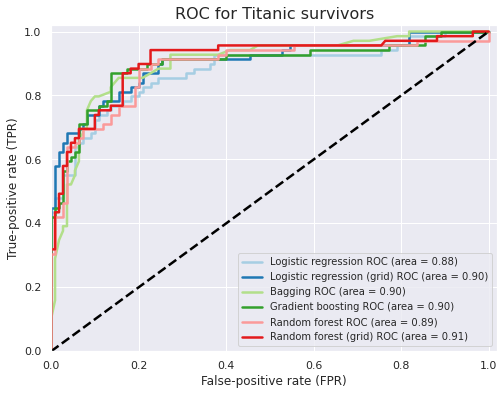

In [60]:
# Depicting model accuracy in a graph
from sklearn.metrics import roc_curve, auc

fig, ax = plt.subplots(figsize=(8, 6))

# Logistic Regression
lr.fit(X_train, y_train)
score_val = lr.decision_function(X_val)
fpr, tpr, thresholds = roc_curve(y_val, score_val)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Logistic regression ROC (area = {roc_auc:0.2f})')

# Logistic Regression with grid search
score_val = lr_grid.decision_function(X_val)
fpr, tpr, thresholds = roc_curve(y_val, score_val)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Logistic regression (grid) ROC (area = {roc_auc:0.2f})')

# Bagging
probabilities = bg.fit(X_train, y_train).predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, probabilities[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Bagging ROC (area = {roc_auc:0.2f})')

# Gradient boosting
probabilities = gb.fit(X_train, y_train).predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, probabilities[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Gradient boosting ROC (area = {roc_auc:0.2f})')

# Random forest
probabilities = rf.fit(X_train, y_train).predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, probabilities[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random forest ROC (area = {roc_auc:0.2f})')

# Random forest with grid search
probabilities = rf_grid.fit(X_train, y_train).predict_proba(X_val)
fpr, tpr, thresholds = roc_curve(y_val, probabilities[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'Random forest (grid) ROC (area = {roc_auc:0.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.02])
plt.ylim([0.0, 1.02])
plt.xlabel('False-positive rate (FPR)')
plt.ylabel('True-positive rate (TPR)')
plt.title('ROC for Titanic survivors', fontsize= 16)
plt.legend(loc=0, fontsize='small');

## Reference

https://nbviewer.jupyter.org/github/porvakanti/Kaggle-Competition-TitanicSurvival/blob/master/Kaggle_Titanic_ML_from_Disasters.ipynb